**Project 214:**
#**Customer Personality Analysis**




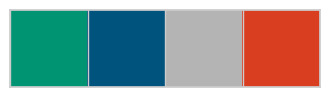

In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date, datetime # for manupulating time and date columns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(['#009473', '#00537c', '#b4b4b4', '#da3e21'])
sns.palplot(palette) # print color palette

In [2]:
df = pd.read_excel('marketing_campaign1.xlsx') 

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [5]:
df.shape

(2240, 29)

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#EDA

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

#FEATURE ENGINEERING

In [10]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [11]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [12]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

In [13]:
# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

In [14]:
# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [15]:
# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [16]:
# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

In [17]:
# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]


In [18]:
#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

In [19]:
#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


In [20]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [21]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [22]:
print(df.shape)

(2240, 37)


#Visualization

<Axes: xlabel='Age', ylabel='Count'>

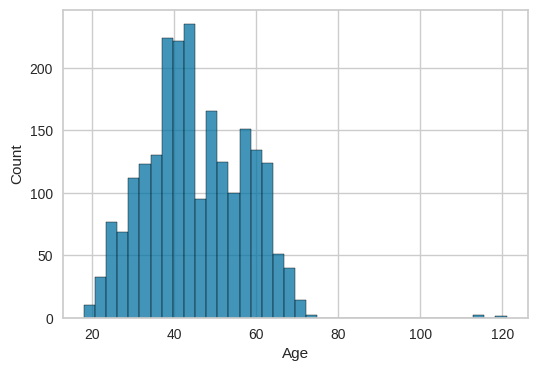

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'])

Text(0.5, 1.0, 'Income')

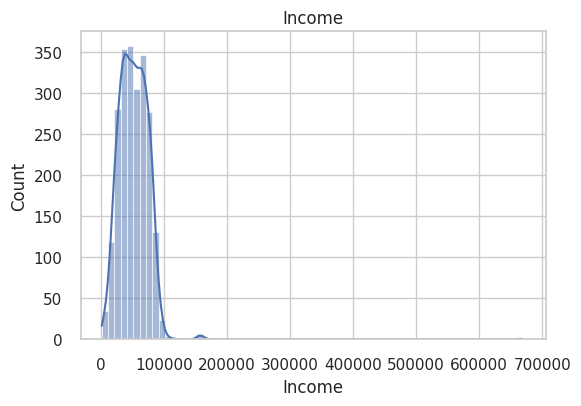

In [24]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
ax = sns.histplot(data=df, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

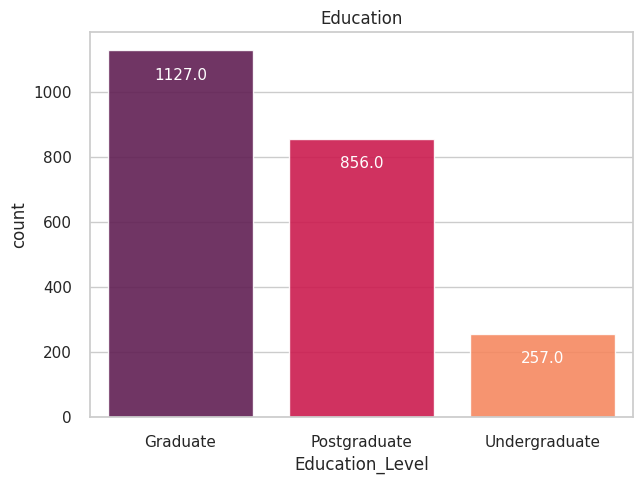

In [25]:
plt.figure(figsize=(7,5))
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='Education_Level', saturation=1, alpha=0.9, palette='rocket', order=df['Education_Level'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

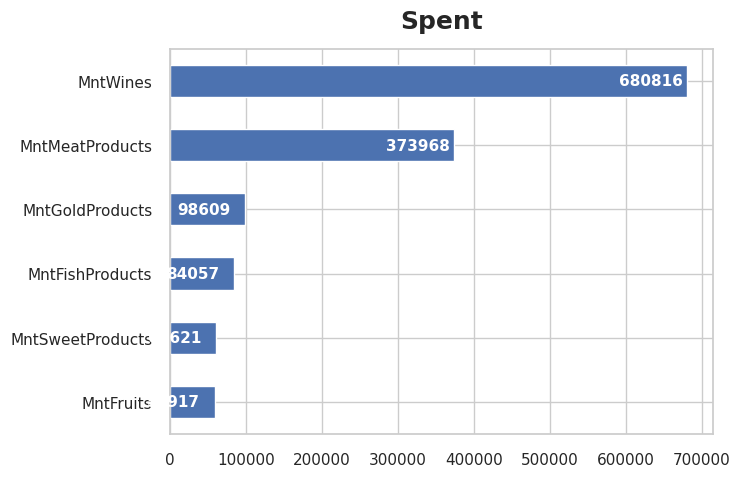

In [26]:
plt.figure(figsize=(7,5))
ax = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Spent', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
  x_value = rect.get_width()
  y_value = rect.get_y() + rect.get_height() / 2
  plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
  textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

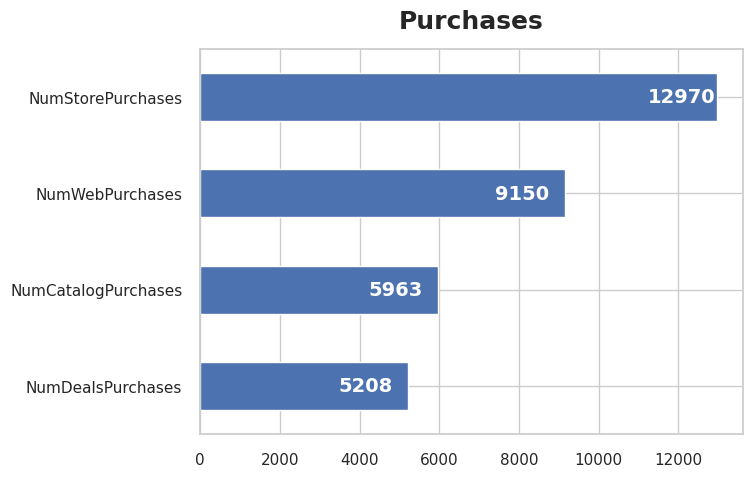

In [27]:
plt.figure(figsize=(7,5))
ax = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
  x_value = rect.get_width()
  y_value = rect.get_y() + rect.get_height() / 2
  plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
  textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

<Axes: xlabel='Total_Acc_Cmp', ylabel='count'>

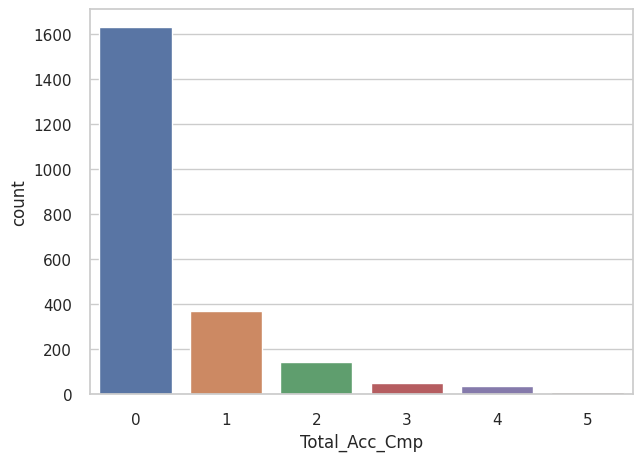

In [28]:
plt.figure(figsize=(7,5))
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Total_Acc_Cmp"])

#Finding Correlation

<Axes: >

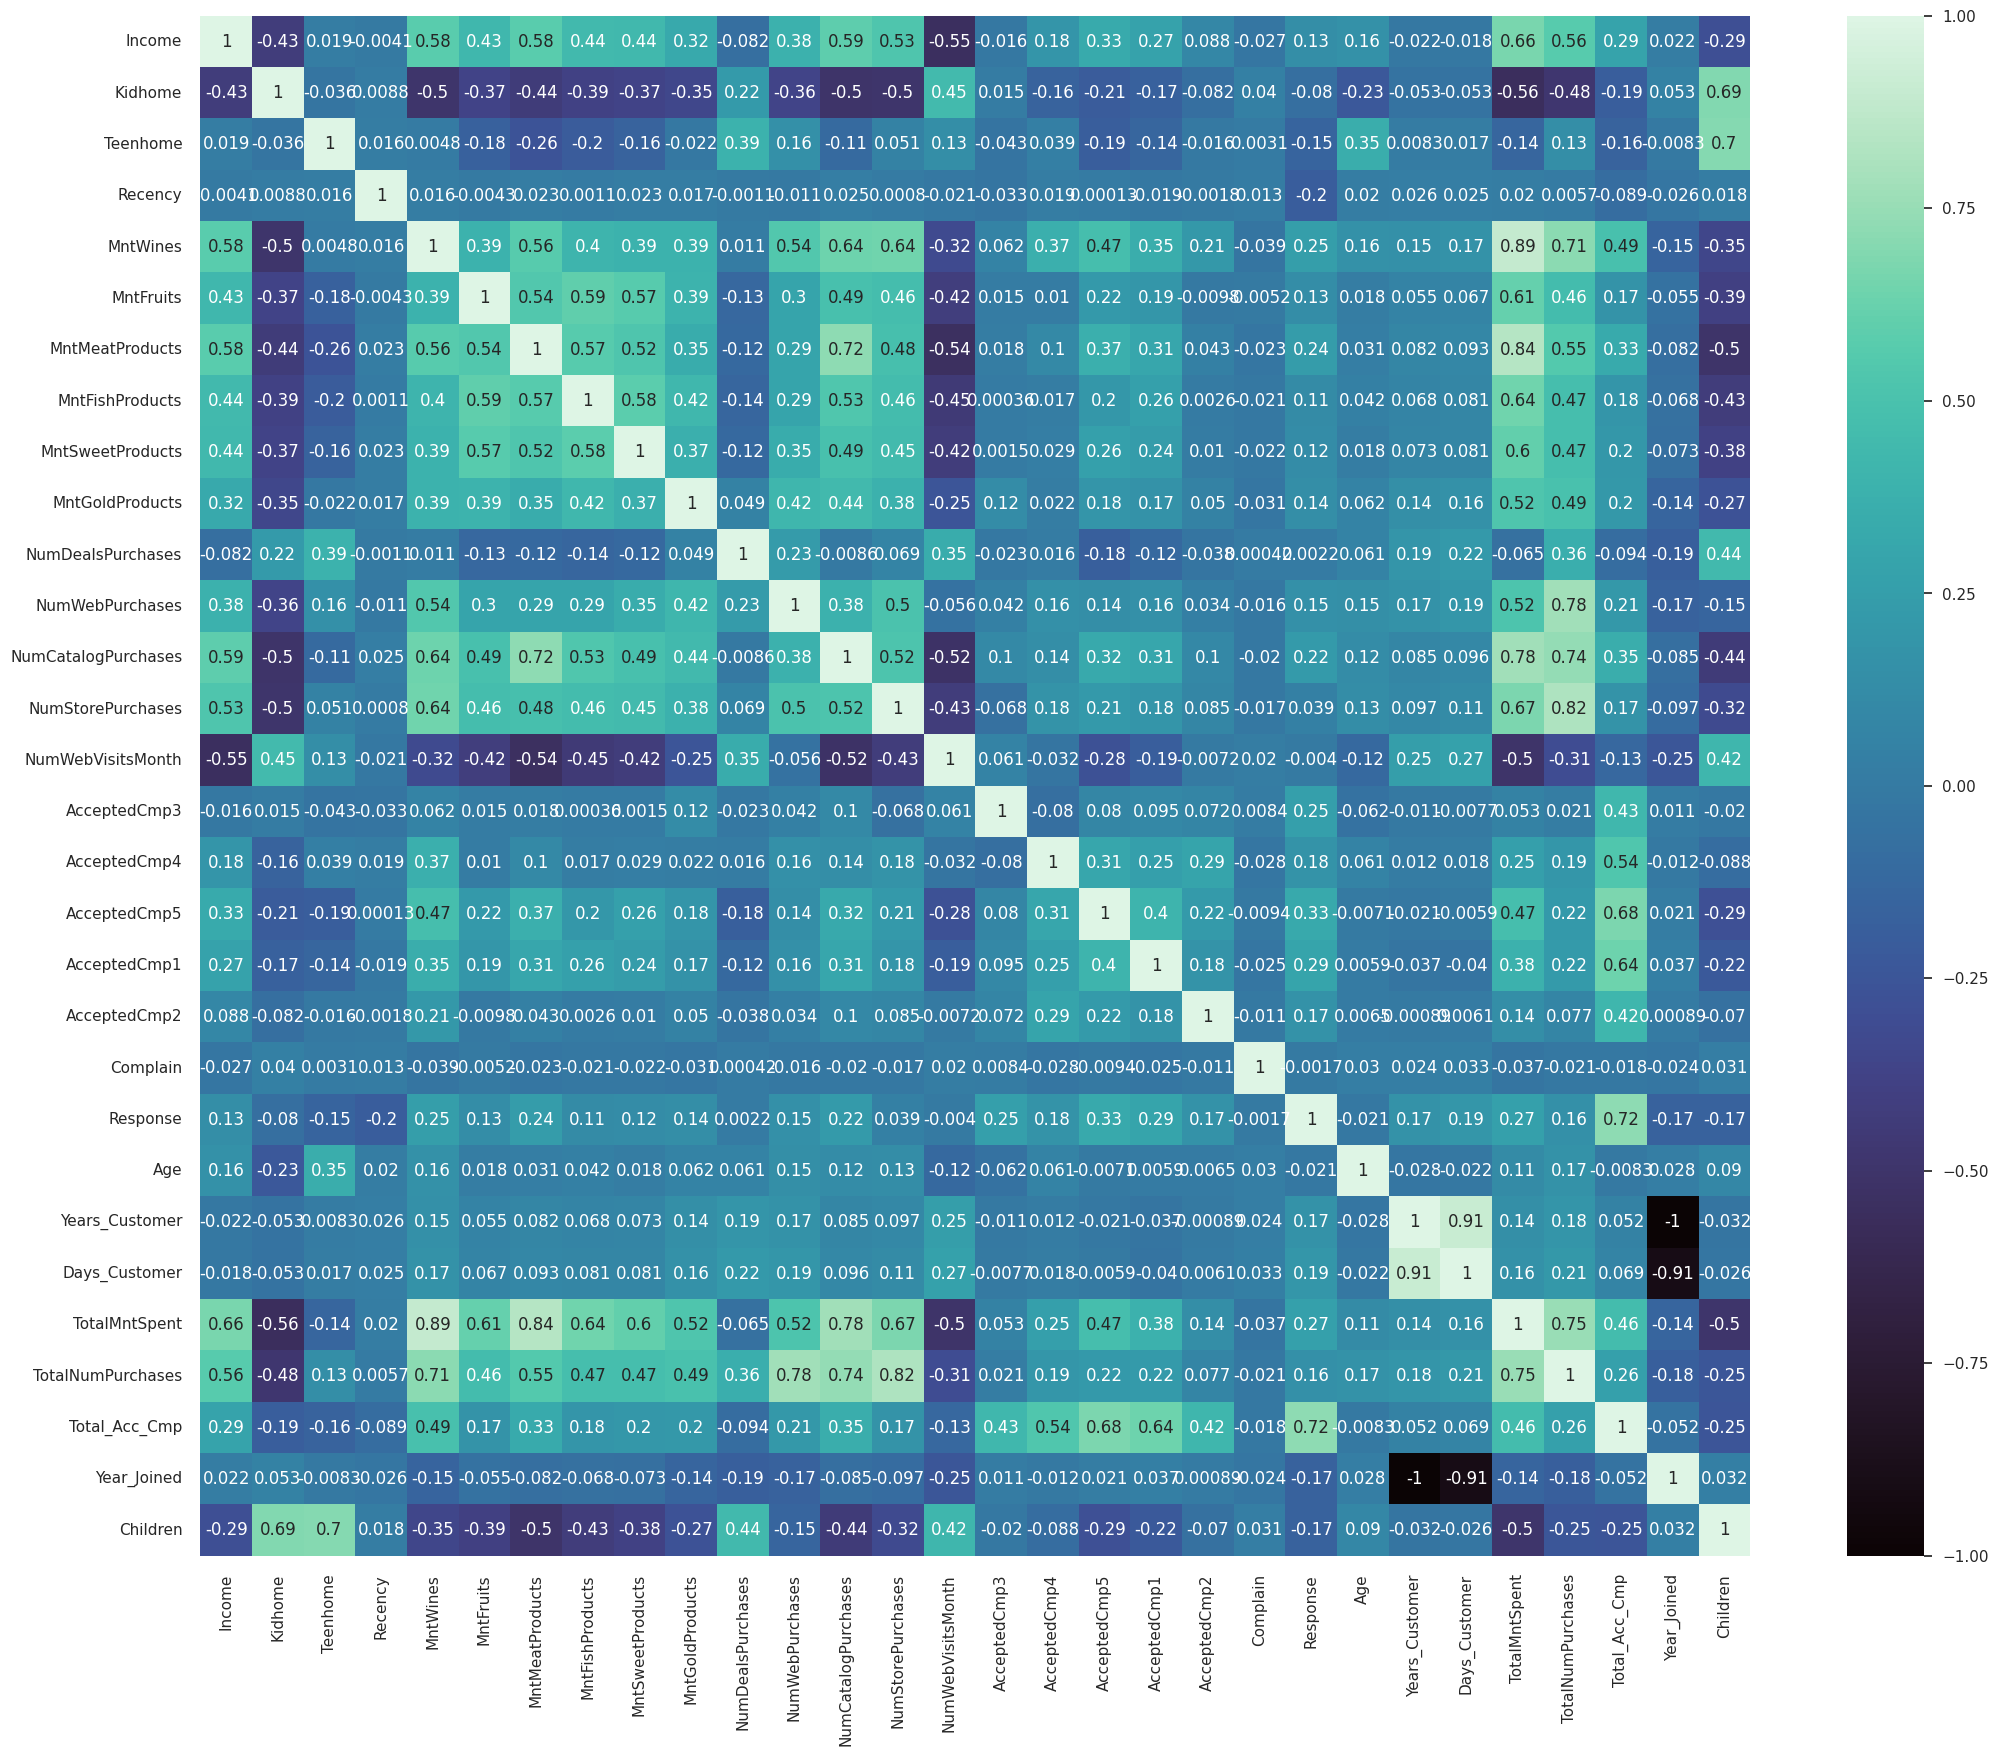

In [29]:
corrmat = df.corr()

plt.figure(figsize=(25,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

In [30]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

#Outlier Detection and Treating the Outliers.

In [31]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df1['Age_Group'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=df1['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.update_layout(title_text='<b>Box Plots for Numerical Variables<b>')

fig.show()

In [32]:
num_col = df1.select_dtypes(include = np.number).columns

In [33]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been treated")

Outliers have been treated


#FEATURE TRANSFORMATION

In [34]:
# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


In [35]:
# examin the min, max and mean of your columns
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


In [36]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [37]:
# I am not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [38]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [39]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [40]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [41]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

In [42]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


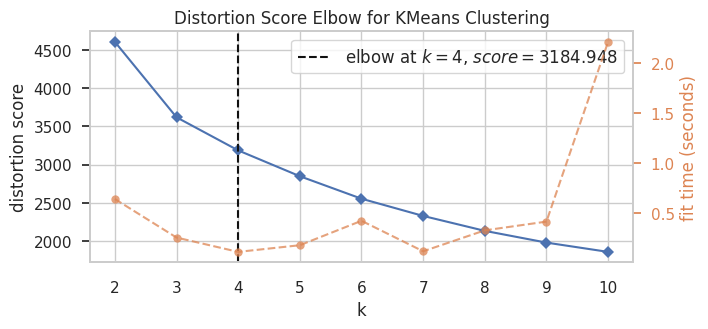

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
plt.figure(figsize=(7,3))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

In [44]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time

In [45]:
# Define clustering methods
clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.MeanShift,
                      cluster.SpectralClustering,
                      cluster.Birch
                     ]

data_arg = [(),(),(),(),(),(),()]

In [46]:
# Define parameters for each clustering method
clustering_para = [{'n_clusters':4},
                   {'n_clusters':4, 'linkage':'ward'},
                   {'cluster_all':False},
                   {'n_clusters':4},
                   {'threshold' : 0.01, 'n_clusters':4}
                  ]

In [47]:
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)


In [48]:
X = transformed
# Compute the silhouette score for each method
for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(X)
    score = silhouette_score(X, y_pred)
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")

Silhouette score for KMeans: 0.255
Silhouette score for AgglomerativeClustering: 0.158
Silhouette score for MeanShift: 0.155
Silhouette score for SpectralClustering: 0.238
Silhouette score for Birch: 0.235


In [49]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column

In [50]:
subset.head(10)

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,1
3,26646.0,1,0,30,Yes,Graduate,0
4,58293.0,1,0,33,Yes,Postgraduate,1
5,62513.0,0,1,47,Yes,Postgraduate,2
6,55635.0,0,1,43,No,Graduate,3
7,33454.0,1,0,29,Yes,Postgraduate,0
8,30351.0,1,0,40,Yes,Postgraduate,0
9,5648.0,1,1,64,Yes,Postgraduate,0


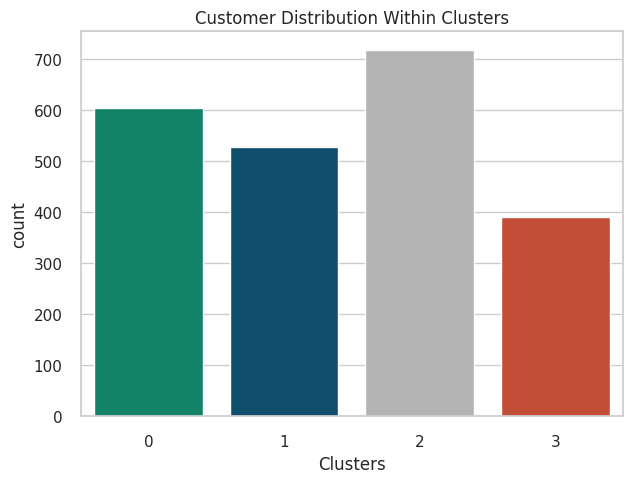

In [51]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(7,5))
sns.countplot(x='Clusters', data=subset, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

Observations
1. Cluster 2 has highest number of customers
2. Cluster 3 has least number of customers

Lets find out what number of customers in each cluster have how many Kids or Teens in household, how many of them have partner and their education level

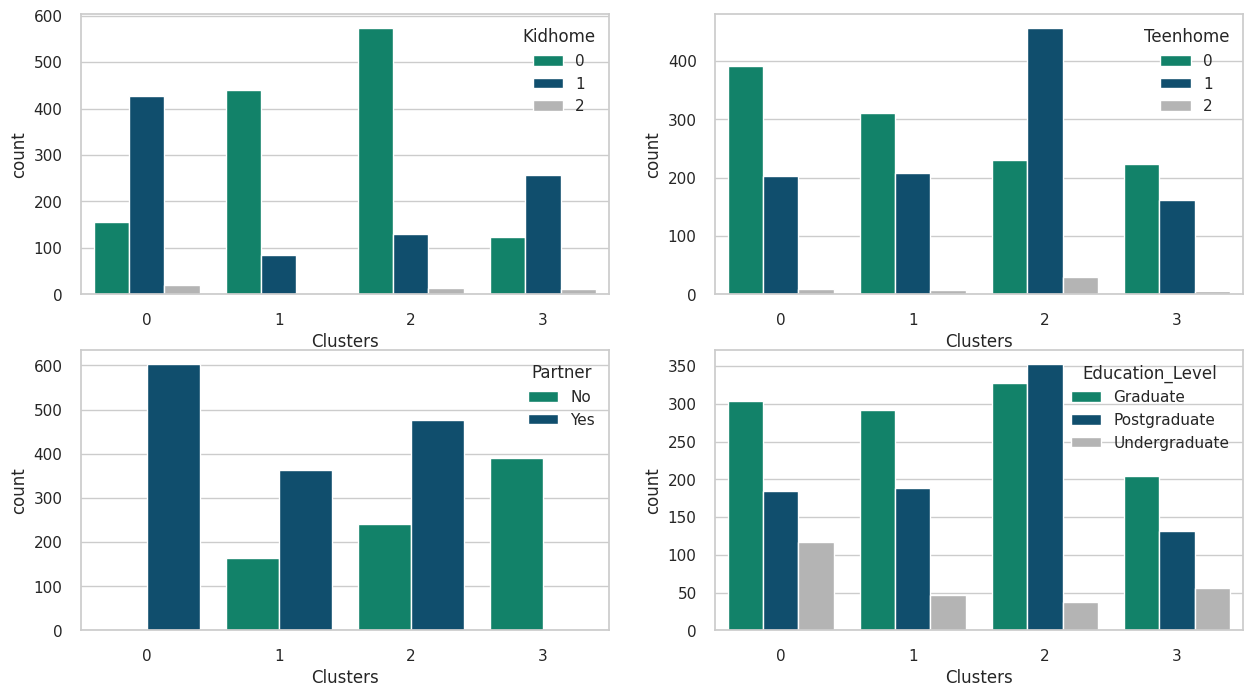

In [52]:
# create list of categories
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(15,8))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

#**Observations**    
**Kidhome:**   
Cluster 0 mostly has customers with 1 kid in household.
Cluster 1 has customers with no kids in household. 
Cluster 2 also has large number of customers with no kids in household.Cluster 3 has customers with 0 and 1 kids in household.

**Teenhome:**    
Cluster 0 consist of customers with no teen in household & few of them have 1 Teen in household.
Same goes for the cluster 1 & 3.
Cluster 2 has customers with 1 Teen in household

**Partner:**   
All the customers in cluster 0 have partner.  All The customers in cluster 3 have no partner. Cluster 1 & 2 has customers with and without partner, but most of them have partner.

**Education_Level:**      
 All clusters have customers with graduate, postgraduate and undergraduate background. All clusters have less number of customers with undergraduate background. Cluter 2 has highest number of postgraduates and graduates



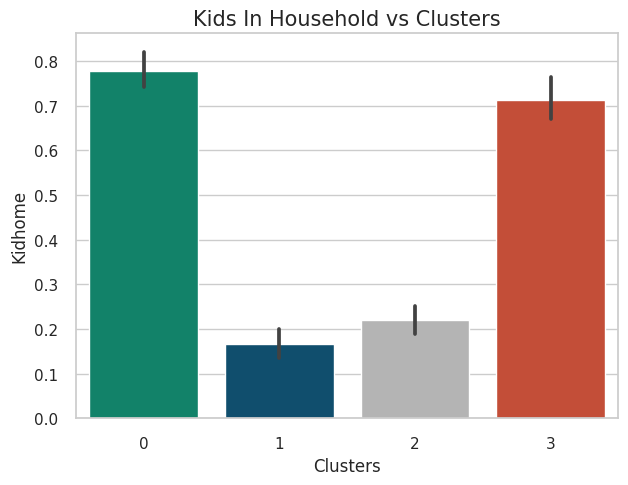

In [53]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(7,5))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"],palette=palette)
plt.title("Kids In Household vs Clusters", size=15)
plt.show()

# **Observation**



1.   Cluster 0 and 3 has the maximum number of customers with kids in household
2.   Cluster 1 and 2 has the least number of customers with kids in household




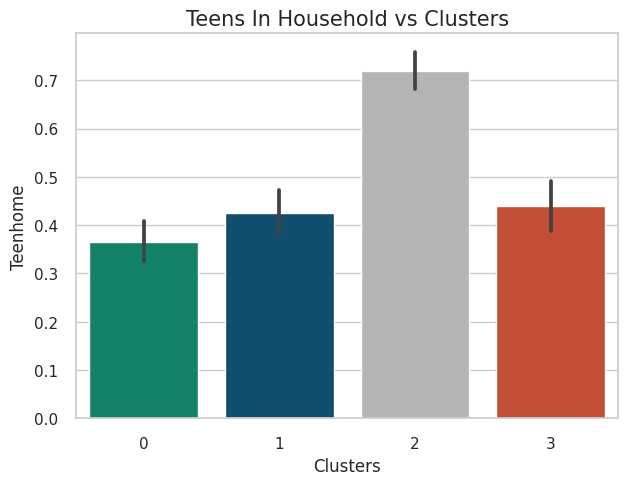

In [54]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(7,5))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"],palette=palette)
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

## **Observations**

1.    Cluster 2 has maximum number of customers having Teens in household

2.   Remaining Clusters also have customers with Teens in household but they are less as compared to cluster 2



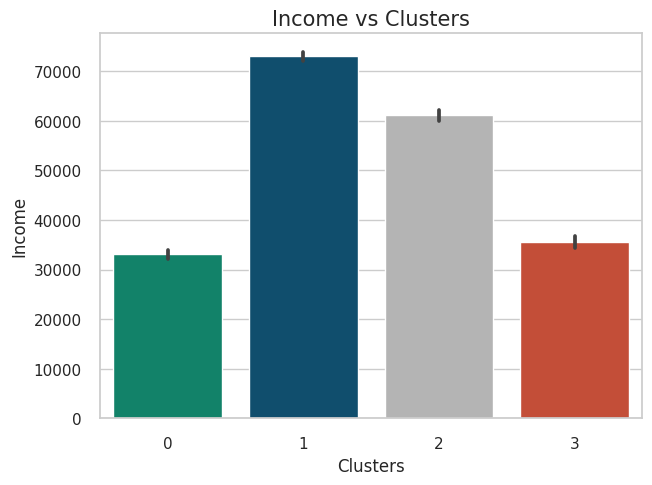

In [55]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(7,5))
sns.barplot(x=subset["Clusters"], y=subset["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

# **Observations**

1.   Cluster 1 has high Income followed by cluster 2. Which is little strange cause cluster 2 has highest number of customers and most number of post graduates & graduates as compared to cluster 1

2.   Cluster 0 and 3 has least income



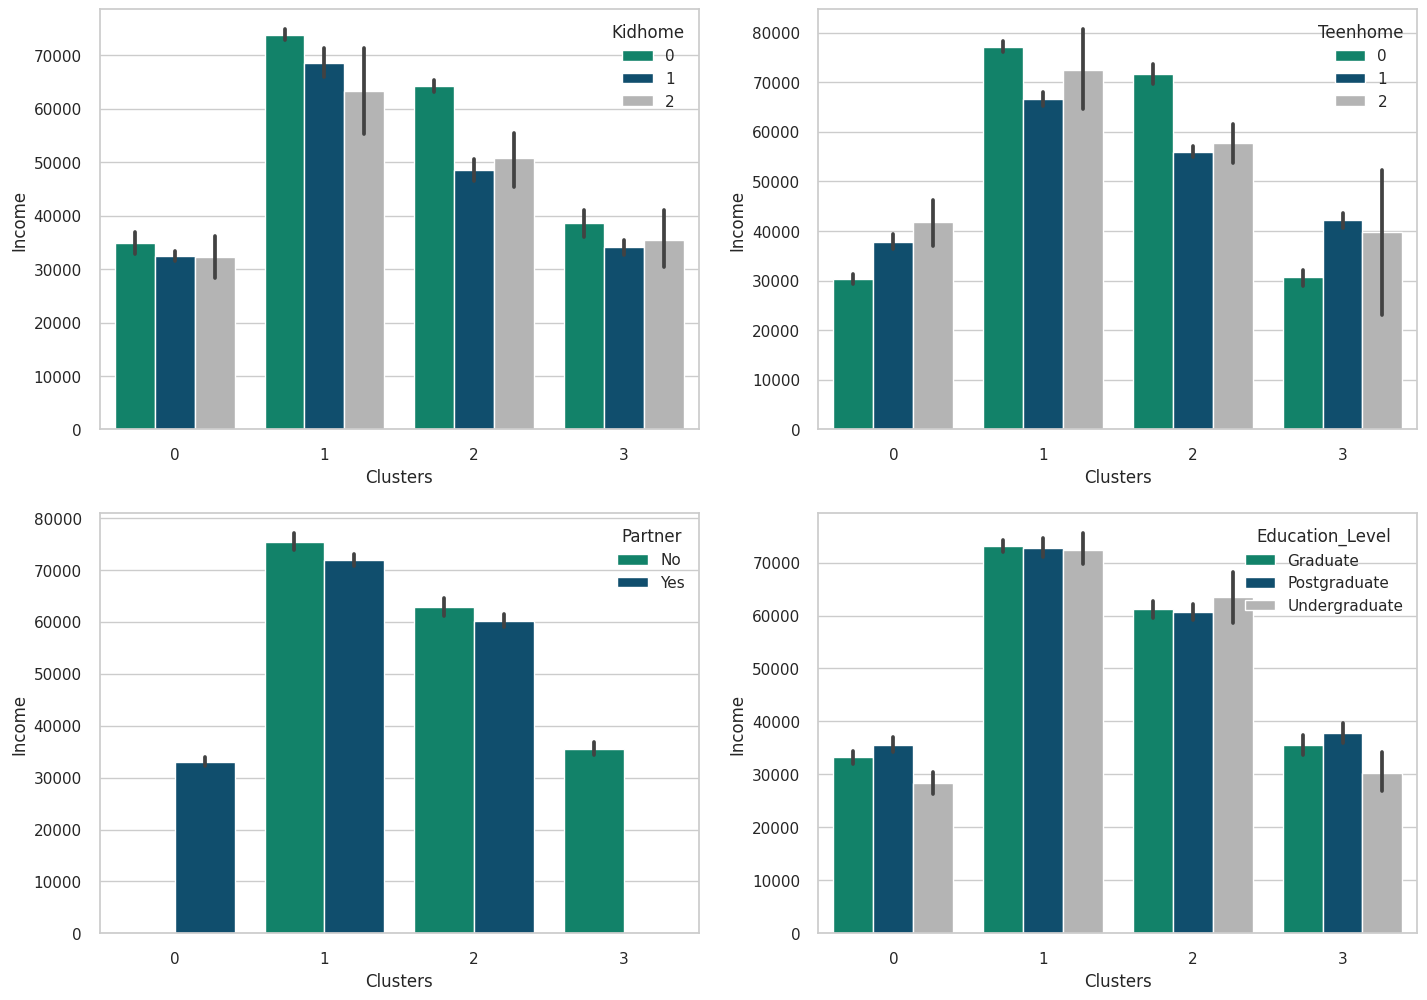

In [56]:
catcols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(17,12))

for i, col in enumerate(catcols):
    sns.barplot(x='Clusters', y='Income', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

# **Observation**

1.    Very interesting thing i can see from first 2 plots is, We saw before the number of customers with 2 kids or teens is very very less still their income is similar to the customers which have no kids or teens or have 1 kid & teen. So I conclude that the customers with more than 1 kid or teen in houehold has high household income 1
2.   From last 2 plots i think education_level and partner has nothing to do with income. Infact undergraduates are earniing equal or more than graduates and postgraduates within each cluster.



#CUSTOMER PROFILING

Cluster 0:
*   **Least Income**
*   1 kid and few have 1 Teen also
*   Graduates and Postgraduates but also has most undergraduates than any cluster
*   All have partner

Cluster 1:
*   Fewer customers but with the **highest income**
*   No kids, few have 1 Teen
*   Graduates and Postgraduates
*   Most of them have partner

Cluster 2:
*   Max number of customers and **high income**
*   No kids, few have 1 or 2 Teen
*   High number of postgraduates and graduates
*   Most of them have partner

Cluster 3:
*   Fewer customers and **less income**
*   1 kid and few have 1 Teen also
*   Graduates and Postgraduates
*   All have no partner


#MODEL BUILDING

In [57]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
# separate features and target column
x = subset.drop('Clusters', axis=1)
y = subset['Clusters']

In [59]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [60]:
# adding GradientBoostingClassifier to transformer pipeline
final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())

In [61]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [62]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)

0.9702380952380952

In [63]:
import pickle

In [64]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb')) 

In [65]:
# Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.892s


In [66]:
%%writefile customer_segmentation_app.py 


# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))

#page configuration
st.set_page_config(page_title = 'Customer Segmentation Web App', layout='centered')
st.title('Customer Segmentation Web App')

# customer segmentation function
def segment_customers(input_data):

 prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1



def main():
    
    Income = st.text_input("Type In The Household Income")
    Kidhome = st.radio ( "Select Number Of Kids In Household", ('0', '1','2') )
    Teenhome = st.radio ( "Select Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( "Select Age", 18, 85 )
    Partner = st.radio ( "Livig With Partner?", ('Yes', 'No') )
    Education_Level = st.radio ( "Select Education", ("Undergraduate", "Graduate", "Postgraduate") )
    
    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])
    
    st.success(result)
    

if __name__ == '__main__':
        main ()
        

Writing customer_segmentation_app.py


#           =======================================================================